In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

nvda_data = pd.read_csv('C:\\Users\\thoutaa\\Downloads\\archive\\NVidia_stock_history.csv', parse_dates = ['Date'])
nvda_data.set_index('Date', inplace = True)
nvda_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [2]:
nvda_data.info()
nvda_data.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 1999-01-22 00:00:00-05:00 to 2024-08-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6442 non-null   float64
 1   High          6442 non-null   float64
 2   Low           6442 non-null   float64
 3   Close         6442 non-null   float64
 4   Volume        6442 non-null   int64  
 5   Dividends     6442 non-null   float64
 6   Stock Splits  6442 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 402.6+ KB


False

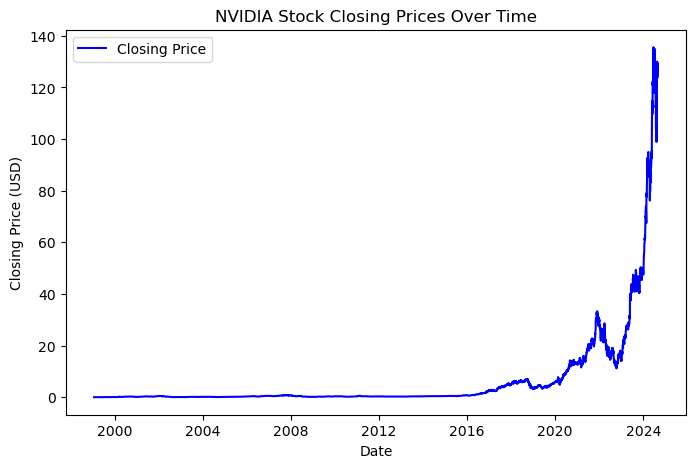

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(nvda_data['Close'], label='Closing Price', color='blue')
plt.title('NVIDIA Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

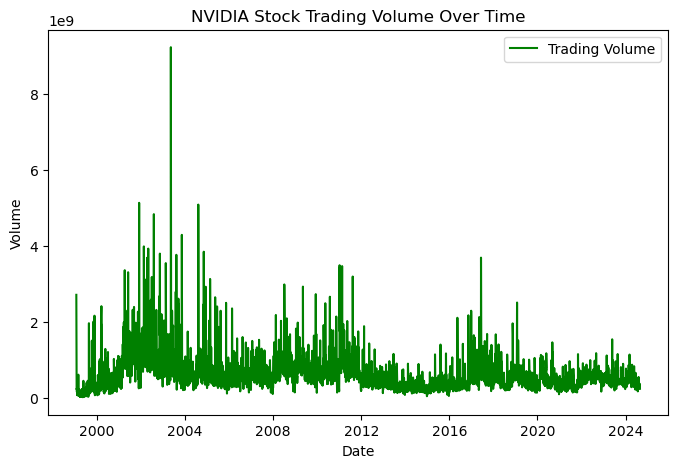

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(nvda_data['Volume'], label='Trading Volume', color='green')
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

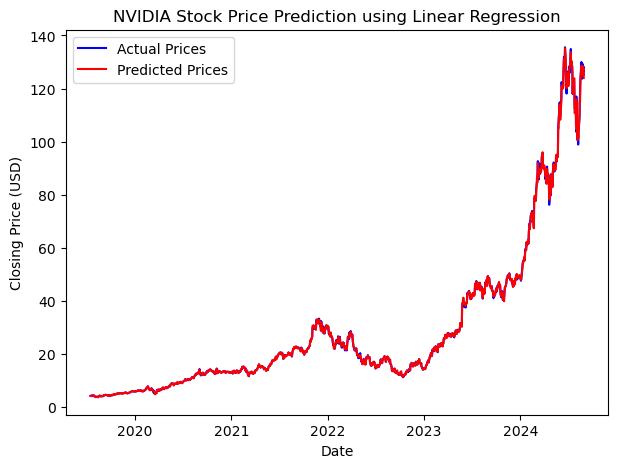

Mean Squared Error: 0.2112307930319989
Mean Absolute Error: 0.2546972951315395
R² Score: 0.9997509448506053


In [5]:
X = nvda_data[['Open', 'High', 'Low']]
y = nvda_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(7, 5))
plt.plot(X_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(X_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('NVIDIA Stock Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Error Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')
